In [3]:
import pandas as pd
import numpy as np
import json
import ast
pd.set_option('display.max_columns', None)

In [4]:
#roman paths
# C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\exercises.csv
# C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\exerciseResults.csv
# C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\users.csv

# jp paths
# mentalport_challenge/mp_data-main/mp_data/exercises.csv
# mentalport_challenge/mp_data-main/mp_data/exerciseResults.csv
# mentalport_challenge/mp_data-main/mp_data/users.csv



exercises_df = pd.read_csv("C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\exercises.csv")
exerciseResults_df = pd.read_csv("C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\exerciseResults.csv")
users_df = pd.read_csv("C:\\Users\\roman\PycharmProjects\\semester_3\\mentalport_challenge\\mp_data-main\\mp_data\\users.csv")

In [5]:
def getUser(df):
    df["__key__user"] = exerciseResults_df["__key__"].apply(lambda x:
        json.loads(x)["__key__"]["path"].replace(" ", "").replace("\"", "").split(",")[1]
    )
    return df["__key__user"]

# def getExercise(df):
#     df["__key__exercise"] = exerciseResults_df["__key__"].apply(lambda x:
#         json.loads(x)["__key__"]["name"]
#     )
#     return df["__key__exercise"]   

def getRating(df):
    df["feedback"] = exerciseResults_df["feedback"].apply(lambda x:
        json.loads(x)["feedback"]["exerciseRating"]["satisfaction"]
    )
    df["satisfaction"] = df["feedback"].apply(lambda x:
        None if (x is None) else x[0]
    )
    return df["satisfaction"]


In [8]:
users_df["__key__user"] = getUser(users_df)

exerciseResults_df["__key__user"] = getUser(exerciseResults_df)
exerciseResults_df["satisfaction"] = getRating(exerciseResults_df)


#exerciseResults_df["__key__exercise"] = getExercise(exerciseResults_df)

#exercises_df["__key__exercise"] = getExercise(exercises_df)



In [7]:

print(exerciseResults_df["feedback"][0])


{
  "feedback": {
    "moodRating": null,
    "exerciseRating": {
      "execution": null,
      "satisfaction": null,
      "__key__": {
        "namespace": "",
        "app": "",
        "path": "",
        "kind": null,
        "name": null,
        "id": null
      }
    },
    "__key__": {
      "namespace": "",
      "app": "",
      "path": "",
      "kind": null,
      "name": null,
      "id": null
    }
  }
}


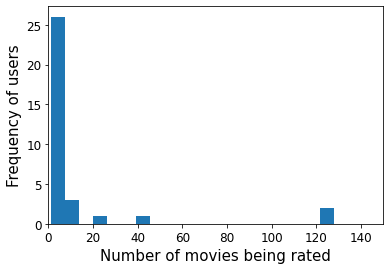

In [12]:
#exploration
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

exerciseResults_df.groupby(['__key__user']).size().hist(bins=20, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlim([0,150])
plt.xlabel("Number of movies being rated", fontsize=15)
plt.ylabel("Frequency of users",fontsize=15)
plt.show()